1. Загрузити файл з даними про споживання енергії “En_In.xls”, який являє собою перелік показників енергозабезпечення та виробництва відновлюваної електроенергії, і ввести їх в DataFrame. Майте на увазі, що це файл Excel, а не .csv. Також необхідно НЕ ВКЛЮЧАТИ інформацію з нижніх та верхніх рядків файлу даних. Перші два стовпці непотрібні, тому їх необхідно виключити із датафрейму, а також поміняти мітки стовпців так, щоб вони були такими: ['Country', 'Energy Supply', 'Energy Supply per Capita', '%Renewable]

In [1]:
%pip install xlrd

     ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
     ------------ ------------------------- 30.7/96.5 kB 435.7 kB/s eta 0:00:01
     ------------------------------------ - 92.2/96.5 kB 871.5 kB/s eta 0:00:01
     -------------------------------------- 96.5/96.5 kB 791.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

In [4]:
energyEXCEL = pd.read_excel('En_In.xls', skiprows=17, skipfooter=38, usecols=[2, 3, 4, 5])
energyEXCEL.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

def left_align(x):return 'text-align: left'

energyTable = energyEXCEL.style.applymap(left_align)
energyTable.set_table_styles([{'selector': 'thead th', 'props': [('text-align', 'left')]}])
energyTable

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321,10,78.669280
1,Albania,102,35,100.000000
2,Algeria,1959,51,0.551010
3,American Samoa,...,...,0.641026
4,Andorra,9,121,88.695650
5,Angola,642,27,70.909090
6,Anguilla,2,136,0.000000
7,Antigua and Barbuda,8,84,0.000000
8,Argentina,3378,79,24.064520
9,Armenia,143,48,28.236060


2. Переведіть дані із стовпчику ‘Energy Supply’ в гДж (Примітка: в 1ПДж = 1000000 ГДж). Для всіх країн, у яких відсутні дані (наприклад, дані з "....."), переконайтеся, що це відображається як значення np.NaN.

In [6]:
energySupplyData = energyEXCEL.copy()
energySupplyData.replace('...', np.nan, inplace=True)
energySupplyData['Energy Supply'] = energySupplyData['Energy Supply'].apply(lambda x: x * 1000000 if not pd.isna(x) else x)

energySupplyTable = energySupplyData.style.applymap(left_align)
energySupplyTable.set_table_styles([{'selector': 'thead th', 'props': [('text-align', 'left')]}])
energySupplyTable

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321000000.000000,10.000000,78.669280
1,Albania,102000000.000000,35.000000,100.000000
2,Algeria,1959000000.000000,51.000000,0.551010
3,American Samoa,nan,nan,0.641026
4,Andorra,9000000.000000,121.000000,88.695650
5,Angola,642000000.000000,27.000000,70.909090
6,Anguilla,2000000.000000,136.000000,0.000000
7,Antigua and Barbuda,8000000.000000,84.000000,0.000000
8,Argentina,3378000000.000000,79.000000,24.064520
9,Armenia,143000000.000000,48.000000,28.236060


3. Перейменуйте наступний список країн: "Republic of Korea": "South Korea", "United States of America": "United States", "United Kingdom of Great Britain and Northern Ireland": "United Kingdom","China, Hong Kong Special Administrative Region": "Hong Kong"

In [7]:
renameDict = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong",
}

In [8]:
energyDataRename = energySupplyData.copy()
energyDataRename['Country'].replace(renameDict, inplace=True)

energyDataRenameTable = energyDataRename.style.applymap(left_align)
energyDataRenameTable.set_table_styles([{'selector': 'thead th', 'props': [('text-align', 'left')]}])
energyDataRenameTable

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321000000.000000,10.000000,78.669280
1,Albania,102000000.000000,35.000000,100.000000
2,Algeria,1959000000.000000,51.000000,0.551010
3,American Samoa,nan,nan,0.641026
4,Andorra,9000000.000000,121.000000,88.695650
5,Angola,642000000.000000,27.000000,70.909090
6,Anguilla,2000000.000000,136.000000,0.000000
7,Antigua and Barbuda,8000000.000000,84.000000,0.000000
8,Argentina,3378000000.000000,79.000000,24.064520
9,Armenia,143000000.000000,48.000000,28.236060


4. Існує також декілька країн, що мають в назві цифри та/або дужки. Обов’язково видаліть їх, напр. 'Bolivia (Plurinational State of)' повинна бути ‘Bolivia’, ‘Switzerland17’ повинна бути Switzerland’.

In [9]:
import re

energyDataRemove = energyDataRename.copy()
energyDataRemove['Country'] = energyDataRemove['Country'].apply(lambda x: re.sub(r'\d+', '', x))
energyDataRemove['Country'] = energyDataRemove['Country'].apply(lambda x: re.sub(r'\([^)]*\)', '', x))

energyDataRemoveTable = energyDataRemove.style.applymap(left_align)
energyDataRemoveTable.set_table_styles([{'selector': 'thead th', 'props': [('text-align', 'left')]}])
energyDataRemoveTable

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321000000.000000,10.000000,78.669280
1,Albania,102000000.000000,35.000000,100.000000
2,Algeria,1959000000.000000,51.000000,0.551010
3,American Samoa,nan,nan,0.641026
4,Andorra,9000000.000000,121.000000,88.695650
5,Angola,642000000.000000,27.000000,70.909090
6,Anguilla,2000000.000000,136.000000,0.000000
7,Antigua and Barbuda,8000000.000000,84.000000,0.000000
8,Argentina,3378000000.000000,79.000000,24.064520
9,Armenia,143000000.000000,48.000000,28.236060


5. Далі, завантажте дані про ВВП з файлу „gpd.csv”, що містить дані Світового банку про ВВП країн від 1960 до 2015 року. Обов’язково не включайте заголовок до датафрейму і перейменуйте наступний список країн: "Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran", "Hong Kong SAR, China": "Hong Kong"

In [16]:
gdp = pd.read_csv('gpd.csv', skiprows=4)

gdp['Country Name'].replace({"Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran", "Hong Kong SAR, China": "Hong Kong"}, inplace=True)
gdp.rename(columns={'Country Name': 'Country'}, inplace=True)

selectedСolumns = ['Country', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
gdp = gdp.loc[:, selectedСolumns]

gdpTable = gdp.style.applymap(left_align)
gdpTable.set_table_styles([{'selector': 'thead th', 'props': [('text-align', 'left')]}])
gdpTable

,Country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,nan,nan,nan,nan,2467703910.614530,nan,nan,nan,nan,nan
1,Andorra,4018195653.510150,4021331428.401050,3675727910.506810,3535389132.602410,3346317328.524610,3185604581.520290,3129537611.886200,3127549907.583770,nan,nan
2,Afghanistan,10305228125.139200,11721187594.205200,12144482858.180000,14697331940.646400,15936800636.248699,16911126453.227600,19352203805.629398,19731337260.637798,19990317160.675598,20294152243.007198
3,Angola,55811028114.647903,68420444001.499496,77874196512.184494,79753199398.139603,82470913120.731400,85702615836.440399,90120963241.218597,96261432368.264496,100886286610.957993,103910558934.020004
4,Albania,9771760095.125540,10348293941.585300,11127520474.298100,11500292411.174400,11926953258.916000,12231090567.667200,12404772053.501400,12542465022.372999,12793314322.820499,13120823169.484699
5,Arab World,1763823829113.090088,1863481356326.669922,1980983302945.669922,2011001139577.909912,2103824906396.060059,2173896465634.169922,2318266914690.419922,2385579629422.560059,2436659330416.810059,2509068276527.700195
6,United Arab Emirates,278948949835.963013,287831772785.526001,297018891707.594971,281446423169.577026,286049336038.120972,300946210244.793030,321692225022.966003,335593704978.687012,350931309582.380005,362100323851.567993
7,Argentina,378814002617.523987,408988709469.622009,421564889399.940002,421775774944.172974,461640242696.171021,500355477549.572021,504367128523.159973,518919894963.107971,521273744038.473999,nan
8,Armenia,8679746345.921900,9873142200.518789,10554389012.520700,9060944166.218410,9260284937.797810,9695518329.746370,10393595649.806299,10736584306.437000,11112364757.038700,11445735699.889601
9,American Samoa,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


6. Завантажте дані з файлу „scimagojr.xlsx”, який класифікує країни на основі їхніх публікацій в журналах у галузі енергетичного машинобудування та енергетичних технологій.

In [12]:
scimagojr = pd.read_excel('scimagojr.xlsx').head(15)

scimagojrTable = scimagojr.style.applymap(left_align)
scimagojrTable.set_table_styles([{'selector': 'thead th', 'props': [('text-align', 'left')]}])
scimagojrTable

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.700000,138
1,2,United States,96661,94747,792274,265436,8.200000,230
2,3,Japan,30504,30287,223024,61554,7.310000,134
3,4,United Kingdom,20944,20357,206091,37874,9.840000,139
4,5,Russian Federation,18534,18301,34266,12422,1.850000,57
5,6,Canada,17899,17620,215003,40930,12.010000,149
6,7,Germany,17027,16831,140566,27426,8.260000,126
7,8,India,15005,14841,128763,37209,8.580000,115
8,9,France,13153,12973,130632,28601,9.930000,114
9,10,South Korea,11983,11923,114675,22595,9.570000,104


7. Приєднайте три набори даних із завдань 1-6 до нового набору даних (використовуючи перетин назв країн).
- Використовуйте лише дані про ВВП за останні 10 років (2006-2015 рр.) і лише 15 найкращих країн за рейтингом Scimagojr (Rank від 1 до 15)
- Індексом цього DataFrame повинна бути назва країни, а стовпцями мають бути ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations','Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '%Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014','2015'].

Ви повинні отримати DataFrame з 15 рядками та 20 стовпцями.

In [19]:
newData = pd.merge(pd.merge(scimagojr, energyDataRemove, on='Country'), gdp, on='Country')

newData.set_index('Country', inplace=True)

dataTable = newData.style.applymap(left_align)
dataTable.set_table_styles([{'selector': 'thead th', 'props': [('text-align', 'left')]}])
dataTable

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.700000,138,127191000000.000000,93.000000,19.754910,3992331462570.890137,4559041383517.929688,4997775145605.959961,5459247267275.139648,6039658508485.589844,6612490294273.650391,7124977970399.610352,7672447738017.419922,8230120617793.519531,8797998940421.279297
Japan,3,30504,30287,223024,61554,7.310000,134,18984000000.000000,149.000000,10.232820,5496541517363.309570,5617035943770.730469,5558526873313.820312,5251308399909.320312,5498717815809.769531,5473738114222.049805,5569101602926.179688,5644658523313.419922,5642884448582.190430,5669563143140.969727
Russian Federation,5,18534,18301,34266,12422,1.850000,57,30709000000.000000,214.000000,17.288680,1385792607182.580078,1504071117741.300049,1583004071092.110107,1459199142720.260010,1524917468442.010010,1589942641764.290039,1645875899596.270020,1666934123163.159912,1678708855070.860107,1616148858033.770020
Canada,6,17899,17620,215003,40930,12.010000,149,10431000000.000000,296.000000,61.945430,1564468853329.449951,1596739898466.320068,1612713061250.239990,1565144676082.310059,1613406134731.120117,1664086754804.889893,1693132927878.080078,1730687770724.129883,1773485821199.770020,1792608764608.810059
Germany,7,17027,16831,140566,27426,8.260000,126,13261000000.000000,165.000000,17.901530,3332890754966.890137,3441560834437.089844,3478809377483.439941,3283339933774.830078,3417298013245.029785,3542371125827.810059,3556723774834.439941,3567317390728.479980,3624386278145.700195,3685555907284.770020
India,8,15005,14841,128763,37209,8.580000,115,33195000000.000000,26.000000,14.969080,1265894322131.090088,1374865195244.500000,1428360609657.800049,1549482541544.699951,1708458876829.919922,1821872415623.620117,1924235460945.250000,2051981849791.689941,2200616575310.970215,2367206118959.060059
France,9,13153,12973,130632,28601,9.930000,114,10597000000.000000,166.000000,17.020280,2607839735099.339844,2669423841059.600098,2674637086092.709961,2595966887417.220215,2646994701986.750000,2702031788079.470215,2706968211920.529785,2722566887417.220215,2729631788079.470215,2761185430463.580078
South Korea,10,11983,11923,114675,22595,9.570000,104,11007000000.000000,221.000000,2.279353,941019882149.125000,992431619676.197021,1020509638539.709961,1027729932849.170044,1094499338702.719971,1134795571930.639893,1160809426196.790039,1194429021591.570068,1234340240503.489990,1266580410309.110107
Italy,11,10964,10794,111850,26661,10.200000,106,6530000000.000000,109.000000,33.667230,2202169663576.160156,2234626814701.990234,2211154176556.290039,2089937511523.179932,2125184794172.189941,2137439133774.830078,2077184315761.590088,2040871178145.699951,2033867707549.669922,2049315603576.159912


8. Створіть функцію, щоб визначити середній ВВП країн за останні 10 років. Ця функція повинна повертати об’єкт Series з 15 країнами та їх середній ВВП, відсортований за спаданням.

In [20]:
def averageGdp(mergedData):
    selectedСolumns = newData.columns[-10:]
    newData['Average GDP'] = newData.loc[:, selectedСolumns].mean(axis=1)
    result = newData.sort_values(by='Average GDP', ascending=False)
    resaultSeries = result['Average GDP'].squeeze()
    return resaultSeries

In [21]:
average = averageGdp(newData)
print(average)
print (type(average))

Country
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Name: Average GDP, dtype: float64
<class 'pandas.core.series.Series'>


9. Створіть функцію, щоб визначити, наскільки змінився ВВП за останні 10 років для країни з 5-м середнім ВВП. Ця функція повинна повертати кортеж із назвою країни та значенням, на яке змінився ВВП.

In [35]:
def gdpChangeFrance(newData):
    fifthCountry = newData.sort_values(by='Average GDP', ascending=False).iloc[4]
    gdpChange = fifthCountry['2015'] - fifthCountry['2006']
    return tuple((average.index[3], gdpChange))

In [36]:
gdpFrance = gdpChangeFrance(newData)
print(gdpFrance)
print (type(gdpFrance))

('France', 474343725980.5698)
<class 'tuple'>


10. Створіть функцію, щоб визначити, в якій країні встановлено максимум поновлюваних джерел енергії (% Renewable) та який саме відсоток. Ця функція повинна повертати кортеж із назвою країни та відсотком.

In [28]:
def maxRenewable(newData):
    maxRenewableRow = newData.loc[newData['% Renewable'].idxmax()]
    return tuple((maxRenewableRow.name, maxRenewableRow['% Renewable']))

In [29]:
maxRenewable = maxRenewable(newData)
print(maxRenewable)
print (type(maxRenewable))

('Brazil', 69.64803)
<class 'tuple'>


11. Створіть стовпець, в якому оцінюється чисельність населення. Для пошуку оцінки використовуйте значення енергопостачання (Energy Supply) та енергопостачання на душу населення (Energy Supply per capita). Яка країна є шостою за цією оцінкою? Ця функція повинна повертати кортеж із назвою країни та населенням

In [41]:
def maxPopulation(newData):
    newData['Population Estimate'] = newData['Energy Supply'] / newData['Energy Supply per Capita']
    sixthCountry = newData.sort_values(by='Population Estimate', ascending=False).iloc[4]
    return tuple((sixthCountry.name, sixthCountry['Population Estimate']))

In [42]:
maxPopulation = maxPopulation(newData)
print(maxPopulation)
print (type(maxPopulation))

('Japan', 127409395.97315437)
<class 'tuple'>


12. Створіть стовпець, в якому оцінюється кількість цитованих документів на одну особу. Який взаємозв'язок між кількістю цитованих документів на душу населення та енергозабезпеченням на душу населення? Використовуйте метод .corr () (кореляція Пірсона). Ця функція повинна повертати одне число

In [44]:
def citationsPerSoul(newData):
    newData['Citations per Capita'] = newData['Citations'] / (newData['Energy Supply'] / newData['Energy Supply per Capita'])
    correlation = newData['Citations per Capita'].corr(newData['Energy Supply per Capita'])
    return correlation

In [45]:
citationsPerSoul = citationsPerSoul(newData)
print(citationsPerSoul)
print (type(citationsPerSoul))

0.7443592662858144
<class 'numpy.float64'>


13. Створіть новий стовпчик в який занесіть 1, якщо значення % відновлюваної енергії (% Renewable) країни дорівнює або вище медіани для всіх країн, і 0, якщо значення (% Renewable) нижче медіани. Ця функція повинна повертати Series, індексом якого є назва країни, відсортована у порядку зростання Rank

In [46]:
medianRenewable = newData['% Renewable'].median()
newData['Renewable Ability'] = (newData['% Renewable'] >= medianRenewable).astype(int)
renewableAbility = newData.sort_values(by='Rank')['Renewable Ability'].squeeze()

print(renewableAbility)
print (type(renewableAbility))

Country
China                 1
Japan                 0
Russian Federation    0
Canada                1
Germany               1
India                 0
France                0
South Korea           0
Italy                 1
Spain                 1
Australia             0
Brazil                1
Name: Renewable Ability, dtype: int32
<class 'pandas.core.series.Series'>


14. Використайте наступний словник, щоб згрупувати країни за континентами, потім створіть DataFrame, який відображає розмір вибірки (кількість країн на кожному континенті), а також суму, середнє та стандартне відхилення для оцінки кількості населення для кожної країни.

In [47]:
ContinentDict = {'China':'Asia',
'United States':'North America',
'Japan':'Asia',
'United Kingdom':'Europe',
'Russian Federation':'Europe',
'Canada':'North America',
'Germany':'Europe',
'India':'Asia',
'France':'Europe',
'South Korea':'Asia',
'Italy':'Europe',
'Spain':'Europe',
'Iran':'Asia',
'Australia':'Australia',
'Brazil':'South America'}

In [48]:
newData['Continent'] = newData.index.map(ContinentDict)
continentData = newData.groupby('Continent')['Population Estimate'].agg(['count', 'sum', 'mean', 'std'])
continentData.columns = ['size', 'sum', 'mean', 'std']

continentDataTable = continentData.style.applymap(left_align)
continentDataTable.set_table_styles([{'selector': 'thead th', 'props': [('text-align', 'left')]}])
continentDataTable

,size,sum,mean,std
Continent,,,,
Asia,4,2821590756.358500,705397689.089625,713877879.434034
Australia,1,23316017.316017,23316017.316017,nan
Europe,5,394058699.474436,78811739.894887,38132276.152709
North America,1,35239864.864865,35239864.864865,nan
South America,1,205915254.237288,205915254.237288,nan


15. Створіть бульбашкову діаграму, що відображає залежність % поновлюван их джерел від рейтингу країни (% Renewable vs. Rank). Розмір бульбашки від повідає ВВП країн 2015 року, а колір відповідає континенту.

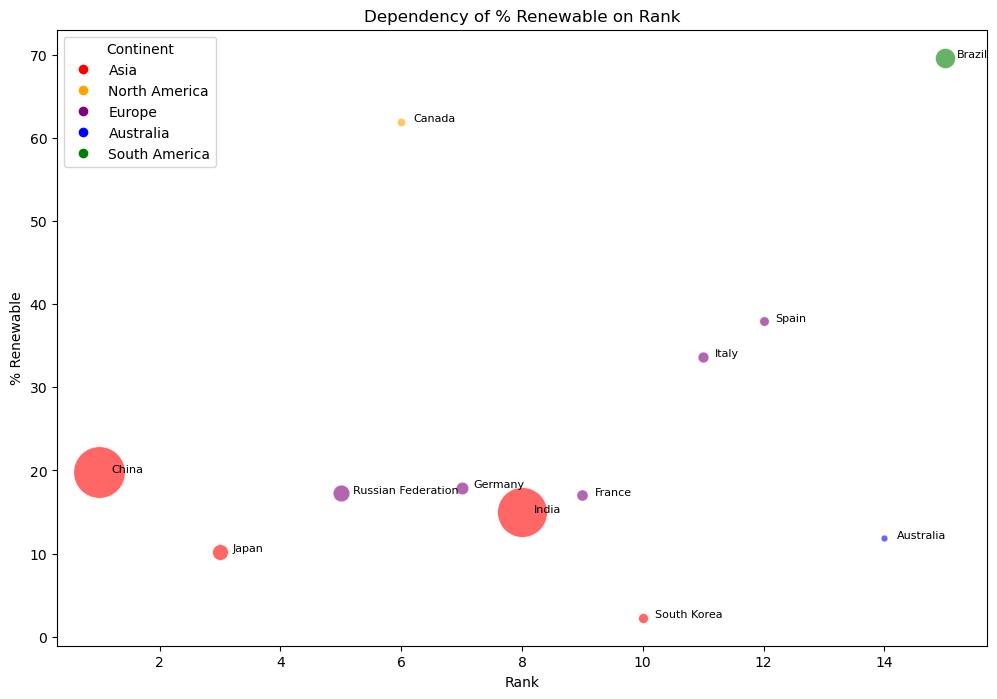

In [49]:
import matplotlib.pyplot as plt

bubble = newData[['Rank', '% Renewable', 'Population Estimate', 'Continent']]
colors = {'Asia': 'red', 'North America': 'orange', 'Europe': 'purple', 'Australia': 'blue', 'South America': 'green'}

plt.figure(figsize=(12, 8))
for i in range(len(bubble)):
    plt.scatter(
        bubble['Rank'][i],
        bubble['% Renewable'][i],
        s=bubble['Population Estimate'][i] / 1e6, 
        c=colors[bubble['Continent'][i]],
        alpha=0.6,
        edgecolors='w', 
        linewidth=0.5 
    )
    plt.text(bubble['Rank'][i] + 0.2, bubble['% Renewable'][i], bubble.index[i], fontsize=8)


plt.title('Dependency of % Renewable on Rank')
plt.xlabel('Rank')
plt.ylabel('% Renewable')


legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=continent, 
                            markerfacecolor=color, markersize=8) for continent, color in colors.items()]
plt.legend(handles=legend_labels, title='Continent')

plt.show()